In [13]:
%load_ext autoreload
%autoreload 2

from imports import *
from utils import *
from models import *
from data import *
from ginr_experiment import *
from ginr_configs import CONFIGS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


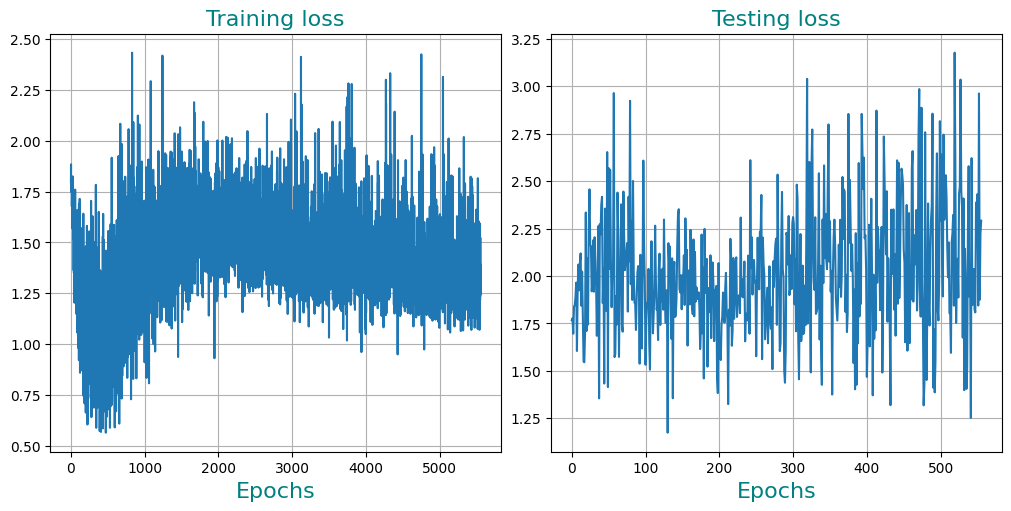

In [31]:
regular_bunny_100_fourier = GINR_Experiment("regular_bunny_100_fourier", CONFIGS["regular_bunny_100_fourier"])
regular_bunny_100_fourier.plot()

In [ ]:
labels = np.load('./regular_bunny_data/train/regular_bunny_labels.npy')